In [1]:
%pylab inline
%config InlineBackend.figure_format='retina'

import seaborn
import networkx
import pandas

Populating the interactive namespace from numpy and matplotlib


In [2]:
contig_summary = pandas.read_excel( 'data/metasub_final_list_of_viral_contigs.xlsx',
                                    sheet_name='viral_contigs',
                                    header=1,
                                    usecols=[1,2,3,4,5] )

print( '%s viral contigs' % contig_summary.shape[0] )

contig_summary.head()

16584 viral contigs


,Contig_ID,gene#,VPFs,Pfams,Length
0,CSC3_NODE_1001_length_10123_cov_5.97825,13,5,0,10123
1,CSC3_NODE_1003_length_10119_cov_11.6328,16,13,1,10119
2,CSC3_NODE_100_length_32592_cov_7.52227,18,14,0,32592
3,CSC3_NODE_1012_length_10091_cov_6.15315,23,7,2,10091
4,CSC3_NODE_1013_length_10074_cov_4.86745,21,5,1,10074


In [3]:
viral_clusters = pandas.read_excel( 'data/metasub_final_list_of_viral_contigs.xlsx',
                                    sheet_name='viral_clusters',
                                    header=1,
                                    usecols=[1,2])

print( '%s viral contigs in %s clusters' % ( viral_clusters.shape[0],
                                             len( set( viral_clusters['Viral_Cluster'] ) ) ) )

viral_clusters.head()

14658 viral contigs in 2063 clusters


,Viral_contig,Viral_Cluster
0,REF:Gammaproteobacteria_gi_559192198-185032-20...,1
1,REF:Gammaproteobacteria_gi_331676385-68809-103169,1
2,REF:Gammaproteobacteria_gi_555578523-578552-62...,1
3,REF:Gammaproteobacteria_gi_485859993,1
4,REF:Gammaproteobacteria_gi_485864642,1


In [4]:
print( 'There are %s MetaSUB viral contigs in viral clusters.' %
    len( set( viral_clusters.Viral_contig ).intersection( set( contig_summary.Contig_ID ) ) ) )

There are 6979 MetaSUB viral contigs in viral clusters.


In [132]:
metadata = pandas.read_excel( 'data/MetaSub_Complete_CSD16_17_with_HudsonAlpha_ID_v1.1.xlsx',
                              sheet_name='MetaSub_Complete_CSD16_17_with_',
                              header=0, )
                              #usecols=[0,2])

metadata.head()

,MetaData,TIER,sample_ID,barcode_ID,HA_ID,CAP_uuid,HA_project,HA_project_title,HA_order_ID,HA_sample_well,...,meta_avg_ridership_16,meta_latitude,meta_longitude,meta_object_swabbed,meta_surface_material,meta_temperature,meta_duplicate,meta_uuid,core_project,metasub_project_name
0,YES,TIER1,CSD16-ILR-001,NaN,4866-KIU-0001,haib17KIU4866_H7HJMCCXY_SL272738,haib17KIU4866,MetaSUB_CSD16,7399.0,3/C/7,...,NaN,8.48466,4.563008,Staircase_,Metal,NaN,NaN,NaN,core,CSD16
1,YES,TIER1,CSD16-ILR-002,NaN,4866-KIU-0002,haib17KIU4866_H7HJMCCXY_SL272739,haib17KIU4866,MetaSUB_CSD16,7399.0,3/C/8,...,NaN,8.45738,4.576873,Mirror...__travelling_to_jos_and_makurdi,NaN,NaN,NaN,NaN,core,CSD16
2,YES,TIER1,CSD16-ILR-003,NaN,4866-KIU-0003,haib17KIU4866_H7HJMCCXY_SL272740,haib17KIU4866,MetaSUB_CSD16,7399.0,3/C/9,...,NaN,8.45741,4.576852,Radio_transmittor,Glass,NaN,NaN,NaN,core,CSD16
3,YES,TIER1,CSD16-ILR-004,NaN,4866-KIU-0004,haib17KIU4866_H7HJMCCXY_SL272741,haib17KIU4866,MetaSUB_CSD16,7399.0,3/C/10,...,NaN,8.45738,4.576812,Hand_brake,Leather,NaN,NaN,NaN,core,CSD16
4,YES,TIER1,CSD16-ILR-005,NaN,4866-KIU-0005,haib17KIU4866_H7HJMCCXY_SL272742,haib17KIU4866,MetaSUB_CSD16,7399.0,3/C/11,...,NaN,8.45736,4.576840,"Steering,",Leather,NaN,NaN,NaN,core,CSD16


In [6]:
sample_uuids = []
for contig in viral_clusters.Viral_contig :
    if contig.__contains__( '_NODE_' ) and not contig.__contains__( '_____' ) :
        sample_uuids.append( contig.split('_NODE_')[0] )
    else :
        sample_uuids.append( None )

viral_clusters['CAP_uuid'] = sample_uuids
viral_clusters.dropna().head()

,Viral_contig,Viral_Cluster,CAP_uuid
217,haib17CEM4890_HKC32ALXX_SL254760_NODE_382_leng...,1,haib17CEM4890_HKC32ALXX_SL254760
231,haib17CEM4890_HKC32ALXX_SL254680_NODE_2240_len...,1,haib17CEM4890_HKC32ALXX_SL254680
235,haib17CEM5106_HCVMTCCXY_SL269616_NODE_737_leng...,1,haib17CEM5106_HCVMTCCXY_SL269616
236,haib17CEM5106_HCV72CCXY_SL269743_NODE_1413_len...,1,haib17CEM5106_HCV72CCXY_SL269743
242,haib17CEM4890_H2NYMCCXY_SL254771_NODE_3551_len...,1,haib17CEM4890_H2NYMCCXY_SL254771


In [112]:
latlon_table = metadata[ metadata.CAP_uuid.isin( viral_clusters.CAP_uuid ) ][ [ 'meta_latitude',
                                                                                'meta_longitude' ] ].dropna()

latlon_table.head()

,meta_latitude,meta_longitude
0,8.48466,4.563008
3,8.45738,4.576812
4,8.45736,4.576840
5,8.4574,4.576872
6,8.45743,4.576958


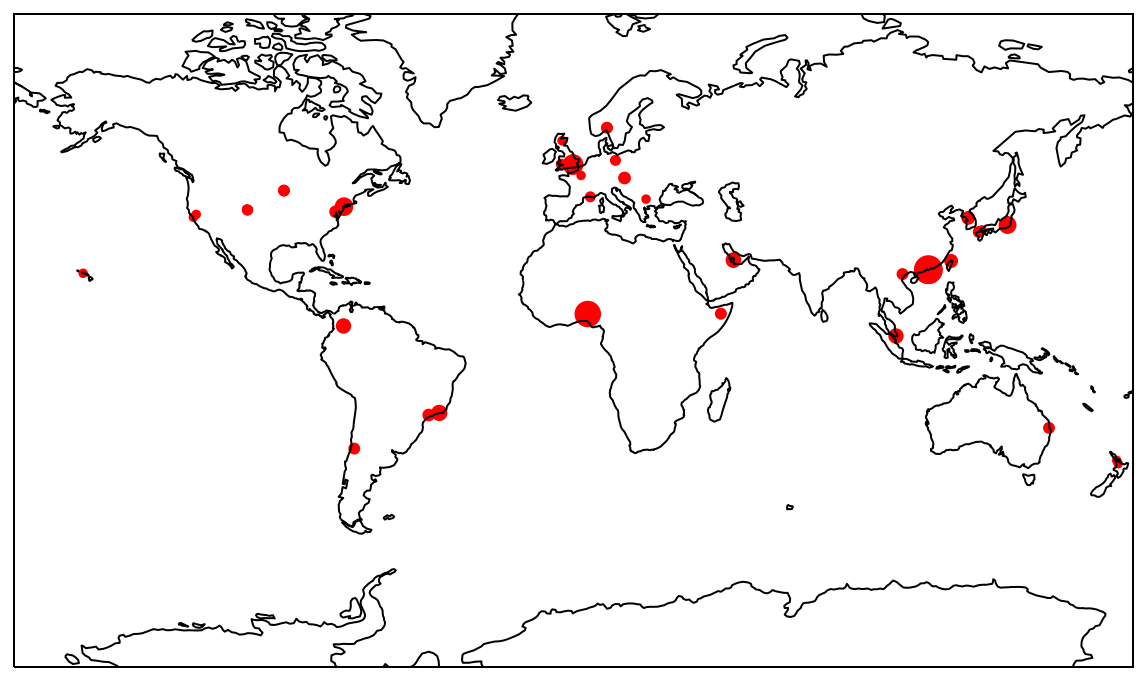

In [110]:
import cartopy.crs
from cartopy.io.img_tiles import OSM

# cartopy hits a segmentation fault if installed using 
# pre-compiled binaries from PyPI, but this can be fixed
# by installing shapely with locally compiled binaries.
#
# https://stackoverflow.com/questions/52374356/cartopy-examples-produce-a-segmentation-fault

figure( figsize=(12,6) )

latlon_table = metadata[ metadata.CAP_uuid.isin( viral_clusters.CAP_uuid ) ][ [ 'meta_latitude',
                                                                                'meta_longitude' ] ].dropna()

locations = {}
for n,(lat,lng) in latlon_table.iterrows() :
    key = '{},{}'.format( round(lat,1), round(lng,1) )
    if not key in locations :
        locations[ key ] = { 'count' : 1, 'lat' : lat, 'lng' : lng }
    else :
        locations[ key ]['count'] = locations[ key ]['count'] + 1

ax = plt.axes( projection=cartopy.crs.Miller() )
#ax.add_image( GoogleTiles( style='satellite' ), 3 )
ax.coastlines()
ax.set_extent( [-180, 180, -80, 80] )

x,y,s = [],[],[]
for key,value in locations.items() :
    x.append( value['lng']   )
    y.append( value['lat']   )
    s.append( value['count'] )
    
    #plot( [value['lng']], [value['lat']], 'ro', s=[value['count']], transform=cartopy.crs.Geodetic() )

s = 8*(array(s)*np.pi)**0.5

scatter( x, y, s=s, color='r', transform=cartopy.crs.Geodetic() )
savefig( 'metasub_viral_map.svg' )

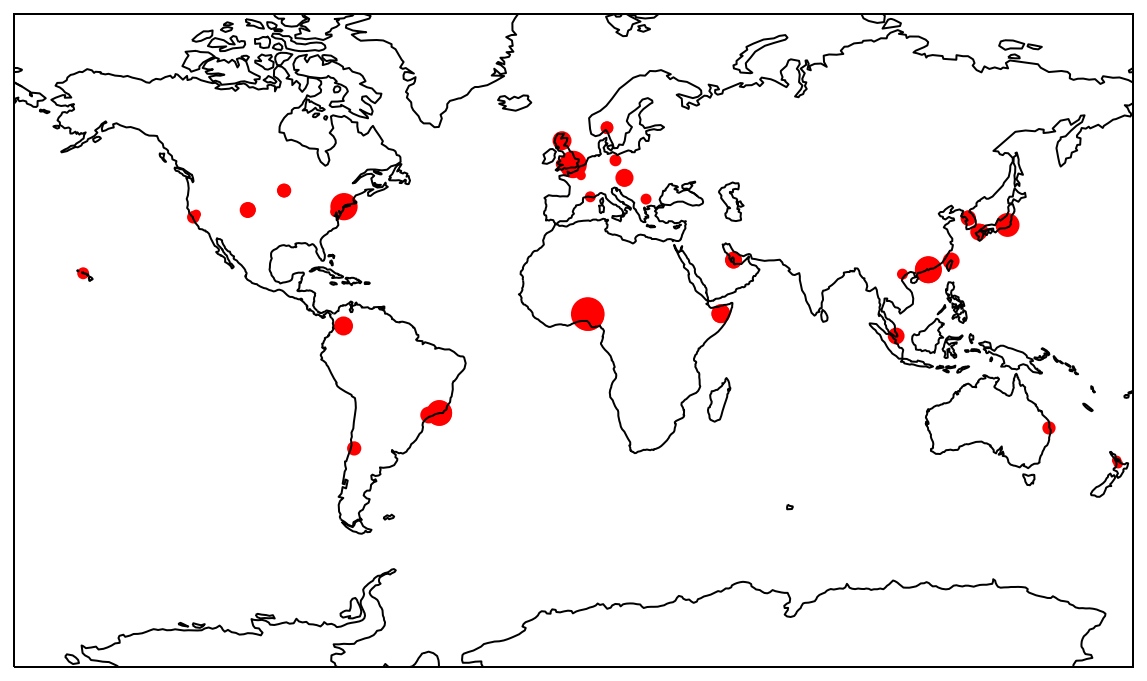

In [160]:
figure( figsize=(12,6) )

latlon_table = viral_clusters.merge(
                 metadata[ metadata.CAP_uuid.isin( 
                 viral_clusters.CAP_uuid ) ], on='CAP_uuid' )[ [ 'Viral_Cluster',
                                                                 'meta_latitude',
                                                                 'meta_longitude'] ].dropna()

locations = {}
for n,(cluster_id,lat,lng) in latlon_table.iterrows() :
    key = '{},{}'.format( round(lat,1), round(lng,1) )
    if not key in locations :
        locations[ key ] = { 'clusters' : set((cluster_id,)), 'lat' : lat, 'lng' : lng }
    else :
        locations[ key ]['clusters'].add( cluster_id )

ax = plt.axes( projection=cartopy.crs.Miller() )
#ax.add_image( GoogleTiles( style='satellite' ), 3 )
ax.coastlines()
ax.set_extent( [-180, 180, -80, 80] )

x,y,s = [],[],[]
for key,value in locations.items() :
    x.append( value['lng']   )
    y.append( value['lat']   )
    s.append( len(value['clusters']) )
    
    #plot( [value['lng']], [value['lat']], 'ro', s=[value['count']], transform=cartopy.crs.Geodetic() )

s = 8*(array(s)*np.pi)**0.5

scatter( x, y, s=s, color='r', transform=cartopy.crs.Geodetic() )
savefig( 'metasub_viralcluster_map.svg' )

In [203]:
from itertools import combinations
import cartopy.feature as cfeature

figure( figsize=(12,6) )

#latlon_table = metadata[ metadata.CAP_uuid.isin( viral_clusters.CAP_uuid ) ][ [ 'meta_latitude',
#                                                                                'meta_longitude' ] ].dropna()

latlon_table = viral_clusters.merge(
                 metadata[ metadata.CAP_uuid.isin( 
                 viral_clusters.CAP_uuid ) ], on='CAP_uuid' )[ [ 'Viral_Cluster',
                                                                 'meta_latitude',
                                                                 'meta_longitude',
                                                                 'CAP_num_reads'] ].dropna()

clump_factor = 5.0

locations = {}
for n,(cluster_id,lat,lng,nreads) in latlon_table.iterrows() :
    if type( nreads )
    
    key = '{},{}'.format( round(round(lat/clump_factor)*clump_factor),
                          round(round(lng/clump_factor)*clump_factor) ) 
    if not key in locations :
        locations[ key ] = { 'clusters' : set((cluster_id,)), 
                             'count'    : 1,
                             'lat'      : lat,
                             'lng'      : lng,
                             'nreads'   : nreads }
    else :
        locations[ key ]['clusters'].add( cluster_id )
        locations[ key ]['count'] = locations[ key ]['count'] + 1
        locations[ key ]['nreads'] = locations[ key ]['nreads'] + nreads
        
ax = plt.axes( projection=cartopy.crs.Miller() )
#ax.add_image( GoogleTiles( style='satellite' ), 3 )
ax.coastlines()
ax.set_extent( [-180, 180, -60, 80] )

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)


x,y,s = [],[],[]
for key,value in locations.items() :
    x.append( value['lng']   )
    y.append( value['lat']   )
    s.append( value['count'] / value['nreads'] )
    
    #plot( [value['lng']], [value['lat']], 'ro', s=[value['count']], transform=cartopy.crs.Geodetic() )

s = 8*(array(s)*np.pi)**0.5

scatter( x, y, s=s, color='r', transform=cartopy.crs.Geodetic() )

s = 8*(array(s)*np.pi)**0.5

scatter( x, y, s=s, 
         color='black', alpha=1, facecolors='none', lw=0.8,
         transform=cartopy.crs.Geodetic() )

for a,b in combinations(locations.values(), 2) :
    plot( [a['lng'], b['lng'] ],
          [a['lat'], b['lat'] ],
          color='b', alpha=0.5,
          lw=len(a['clusters'].intersection(b['clusters']) )/10,
          transform=cartopy.crs.Geodetic() )

TypeError: unsupported operand type(s) for +: 'int' and 'str'

<Figure size 864x432 with 0 Axes>

In [207]:
latlon_table.loc[n]

Viral_Cluster                              781
meta_latitude                          40.7529
meta_longitude                        -73.9777
CAP_num_reads     and a little bit of the door
Name: 6227, dtype: object

In [25]:
import gzip
from Bio import SeqIO
from pyprind import ProgBar

progbar = ProgBar( contig_summary.shape[0], 'finding viral contigs...' )

with open( 'data/viral_contigs.fasta', 'w' ) as f :
    #with open( 'data/assemblies_5kb.fasta', 'rU' ) as handle:
    with gzip.open( 'data/assemblies_5kb.fasta.gz', 'rt' ) as handle :
        for n,record in enumerate( SeqIO.parse( handle, 'fasta' ) ) :
            if record.id in set( contig_summary.Contig_ID ) :
                f.write( record.format( 'fasta' ) )
                progbar.update()

0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:45:02
